In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Set Style Visualisasi
sns.set_theme(style='whitegrid')

# Load Data dari URL Eksternal
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/EmployeeAttrition.csv"
try:
    df = pd.read_csv(url)
    print("Dataset berhasil diload!")
    print(f"Shape Awal: {df.shape}")
except Exception as e:
    print("Gagal load data:", e)

df.head()

Dataset berhasil diload!
Shape Awal: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [202]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [203]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [204]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [205]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [206]:
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df_clean = df.drop(drop_cols, axis=1, errors='ignore')

# Encoding Manual (Binary)
# Attrition (Target): Yes=1, No=0
df_clean['Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})
df_clean['OverTime'] = df_clean['OverTime'].map({'Yes': 1, 'No': 0})
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female': 0})
df_clean['YearlyIncome'] = df_clean['MonthlyIncome'] * 12

# One-Hot Encoding untuk sisa kolom Kategori (BusinessTravel, Dept, dll)
df_final = pd.get_dummies(df_clean, drop_first=True)

print("Data telah siap. Shape akhir:", df_final.shape)
df_final.head()

Data telah siap. Shape akhir: (1470, 46)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,...,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,...,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,...,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,...,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,...,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,...,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False


In [207]:
# Pisahkan Fitur (X) dan Target (y)
X = df_final.drop('Attrition', axis=1)
y = df_final['Attrition']

# Split 80% Train : 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Latih: {X_train.shape}")
print(f"Data Uji  : {X_test.shape}")

# Inisialisasi Model
model = RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               class_weight='balanced')

# Latih Model
print("Sedang melatih model...")
model.fit(X_train, y_train)
print("Training Selesai!")

Data Latih: (1176, 45)
Data Uji  : (294, 45)
Sedang melatih model...
Training Selesai!


=== EVALUASI MODEL (Threshold 0.2) ===
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       255
           1       0.29      0.59      0.39        39

    accuracy                           0.76       294
   macro avg       0.61      0.69      0.62       294
weighted avg       0.84      0.76      0.79       294



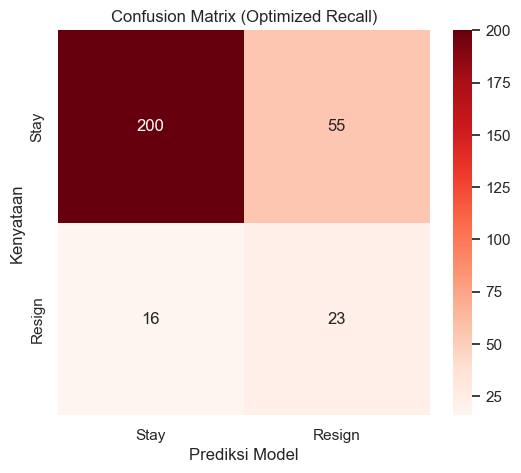

In [208]:
# Prediksi Probabilitas
y_prob = model.predict_proba(X_test)[:, 1]

# Atur Threshold (0.2)
threshold = 0.2
y_pred_tuned = (y_prob >= threshold).astype(int)

# Tampilkan Laporan Evaluasi
print(f"=== EVALUASI MODEL (Threshold {threshold}) ===")
print(classification_report(y_test, y_pred_tuned))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Stay', 'Resign'], yticklabels=['Stay', 'Resign'])
plt.title('Confusion Matrix (Optimized Recall)')
plt.ylabel('Kenyataan')
plt.xlabel('Prediksi Model')
plt.show()

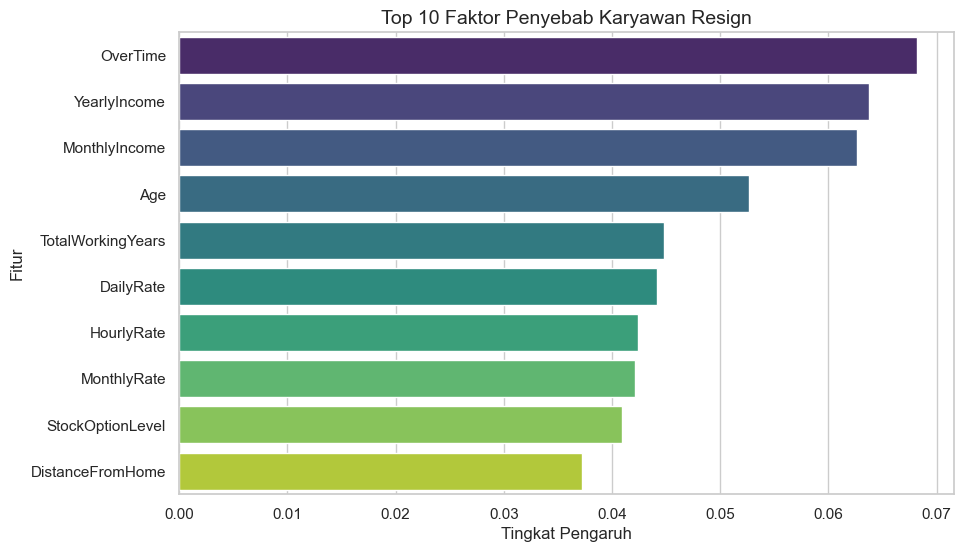

=== INSIGHT BISNIS ===
                Fitur  Importance
13           OverTime    0.068222
25       YearlyIncome    0.063793
10      MonthlyIncome    0.062673
0                 Age    0.052639
18  TotalWorkingYears    0.044803


In [212]:
# Ambil tingkat kepentingan fitur
importances = model.feature_importances_

# Buat DataFrame
feature_rank = pd.DataFrame({
    'Fitur': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi Top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_rank.head(10), x='Importance', y='Fitur', palette='viridis', hue='Fitur')
plt.title('Top 10 Faktor Penyebab Karyawan Resign', fontsize=14)
plt.xlabel('Tingkat Pengaruh')
plt.show()

print("=== INSIGHT BISNIS ===")
print(feature_rank.head(5))